#  1. 一元线性回归

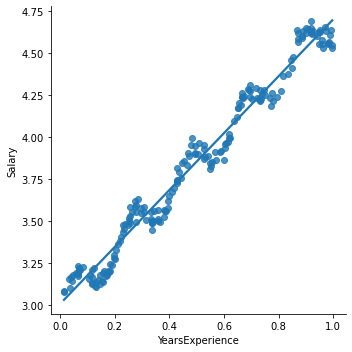

In [1]:
# 工作年限与收入之间的散点图
# 导入第三方模块
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# 导入数据集
#income = pd.read_csv(r'Salary_Data.csv')
income = pd.read_csv(r'st.csv')
# 绘制散点图
sns.lmplot(x = 'YearsExperience', y = 'Salary', data = income, ci = None)
# 显示图形
plt.show()

In [2]:
# 方法1： 简单线性回归模型的参数求解
# 样本量
n = income.shape[0]
# 计算自变量、因变量、自变量平方、自变量与因变量乘积的和
sum_x = income.YearsExperience.sum()    # 自变量：多年经验
sum_y = income.Salary.sum() # 因变量：销售额
sum_x2 = income.YearsExperience.pow(2).sum()    # 自变量平方
xy = income.YearsExperience * income.Salary # 乘积和
sum_xy = xy.sum()
# 根据公式计算回归模型的参数
b = (sum_xy-sum_x*sum_y/n)/(sum_x2-sum_x**2/n)
a = income.Salary.mean()-b*income.YearsExperience.mean()
# 打印出计算结果
print('回归参数a的值：',a)
print('回归参数b的值：',b)

回归参数a的值： 3.0077432426975887
回归参数b的值： 1.6953226421712224


（2）建立房价与面积的线性模型

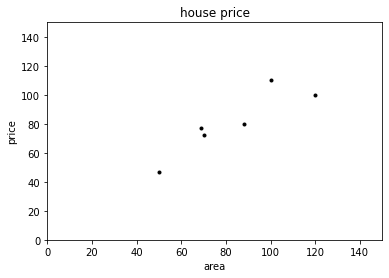

In [3]:
# 方法1：利用公式计算
import matplotlib.pyplot as plt

def drawplt():
    plt.figure()
    plt.title('house price')
    x=[[50], [70], [88], [69], [100], [120]]
    y=[[47], [72], [80], [77], [110], [100]]
    plt.plot(x,y, 'k.')
    plt.xlabel('area')
    plt.ylabel('price')
    plt.axis([0,150,0,150])
    
drawplt()
plt.show()


In [4]:
import pandas as pd
x=[[50], [70], [88], [69], [100], [120]]
df1=pd.DataFrame(x)
df1
y=[[47], [72], [80], [77], [110], [100]]
df2=pd.DataFrame(y)
df2

df3 = pd.concat([df1,df2],axis=1)
df3.columns = ['area', 'price']
print(df3)

n = df3.shape[0]
print(n)
# 计算自变量、因变量、自变量平方、自变量与因变量乘积的和
sum_x = df3.area.sum()
sum_y = df3.price.sum()
sum_x2 = df3.area.pow(2).sum()
xy = df3.area * df3.price
sum_xy = xy.sum()
# 根据公式计算回归模型的参数
b = (sum_xy-sum_x*sum_y/n)/(sum_x2-sum_x**2/n)  # 斜率
a = df3.price.mean()-b*df3.area.mean()   #截距
 
# 打印出计算结果
print('回归参数--截距a的值：',a)
print('回归参数--斜率b的值：',b)

ar=130   # 130m2  
res=b*ar+a  # 房价
print('预测130m2的房价为：',res)

   area  price
0    50     47
1    70     72
2    88     80
3    69     77
4   100    110
5   120    100
6
回归参数--截距a的值： 15.353009935710162
回归参数--斜率b的值： 0.7925189947399176
预测130m2的房价为： 118.38047925189944


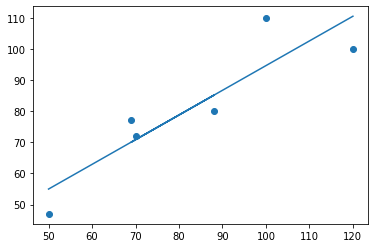

In [5]:
#绘制直线
import numpy as np
plt.scatter(x,y)

h_theta = a+b* np.array(x)
plt.plot(x,h_theta)

In [6]:
# 方法2：调用第三方模块statsmodels.api的函数formula.ols计算

# 导入第三方模块
import statsmodels.api as sm

df3 = pd.concat([df1,df2],axis=1)
df3.columns = ['area', 'price']
print(df3)

# 利用收入数据集，构建回归模型
fit = sm.formula.ols('price ~ area', data=df3).fit()
# 返回模型的参数值
fit.params

/Users/orekimai/.conda/envs/MachineLearning/lib/python3.9/site-packages/statsmodels/compat/pandas.py:61: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import Int64Index as NumericIndex


   area  price
0    50     47
1    70     72
2    88     80
3    69     77
4   100    110
5   120    100


Intercept    15.353010
area          0.792519
dtype: float64

In [7]:
# 方法3：调用第三方模块sklearn的类LinearRegression计算
from sklearn import linear_model
reg = linear_model.LinearRegression()
reg.fit([[50], [70], [88], [69], [100], [120]],[47, 72, 80, 77, 110, 100])

print('截距:',reg.intercept_)
print('斜率:',reg.coef_)
# 系数矩阵就是coef_，截距就是intercept_

a= reg.predict([[130]])
print(a)

截距: 15.353009935710105
斜率: [0.79251899]
[118.38047925]


#  2.多元线性回归

In [8]:
# 产品利润
# 多元线性回归模型的构建和预测
# 导入模块
from sklearn import model_selection
import pandas as pd
# import seaborn as sns
import statsmodels.api as sm

# 导入数据
Profit = pd.read_excel(r'Predict to Profit.xlsx')
print('数据预览：')
Profit.head()

数据预览：


,RD_Spend,Administration,Marketing_Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [9]:
# 方法1：使用sm.formula.ols函数求解
# 将数据集拆分为训练集和测试集
train, test = model_selection.train_test_split(Profit, test_size = 0.2, random_state=1234)

# 根据train数据集建模， C(State)--将State变量当作分类变量来处理
model = sm.formula.ols('Profit ~ RD_Spend + Administration + Marketing_Spend + C(State)',
                       data = train).fit()
print('模型的偏回归系数分别为：\n', model.params)

# 删除test数据集中的Profit变量，用剩下的自变量进行预测
test_X = test.drop(labels = 'Profit', axis = 1)

pred = model.predict(exog = test_X)
print('对比预测值和实际值的差异：\n',pd.DataFrame({'Prediction':pred,'Real':test.Profit}))

模型的偏回归系数分别为：
 Intercept               58581.516503
C(State)[T.Florida]       927.394424
C(State)[T.New York]     -513.468310
RD_Spend                    0.803487
Administration             -0.057792
Marketing_Spend             0.013779
dtype: float64
对比预测值和实际值的差异：
        Prediction       Real
8   150621.345801  152211.77
48   55513.218079   35673.41
14  150369.022458  132602.65
42   74057.015562   71498.49
29  103413.378282  101004.64
44   67844.850378   65200.33
4   173454.059691  166187.94
31   99580.888894   97483.56
13  128147.138396  134307.35
18  130693.433835  124266.90


In [10]:
#  方法2：调用第三方模块sklearn的类LinearRegression计算
from sklearn import linear_model

# 生成由State变量衍生的哑变量
dummies = pd.get_dummies(Profit.State)
# 将哑变量与原始数据集水平合并
Profit_New = pd.concat([Profit,dummies], axis = 1)
# print(Profit_New.head())

# 删除State变量和California变量（因为State变量已被分解为哑变量，New York变量需要作为参照组）
Profit_New.drop(labels = ['State'], axis = 1, inplace = True)

# print(Profit_New.head())

# 删除test数据集中的Profit变量，用剩下的自变量进行预测
test_X = Profit_New.drop(labels = 'Profit', axis = 1)
print(test_X.head())

reg = linear_model.LinearRegression()
reg.fit(test_X, Profit.Profit)  # 需要把类别属性转换成数值型

print('截距:',reg.intercept_)
print('斜率:',reg.coef_)
# 系数矩阵就是coef_，截距就是intercept_

    RD_Spend  Administration  Marketing_Spend  California  Florida  New York
0  165349.20       136897.80        471784.10           0        0         1
1  162597.70       151377.59        443898.53           1        0         0
2  153441.51       101145.55        407934.54           0        1         0
3  144372.41       118671.85        383199.62           0        0         1
4  142107.34        91391.77        366168.42           0        1         0
截距: 52206.48485016301
斜率: [ 7.83589437e-01 -2.20224533e-02  2.58211555e-02  1.17274732e+03
 -3.91476930e+02 -7.81270386e+02]
